In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
animals = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')

In [4]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               344 non-null    object 
 1   Stage                344 non-null    object 
 2   Individual ID        344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
 9   Comments             26 non-null     object 
dtypes: float64(6), object(4)
memory usage: 27.0+ KB


In [5]:
animals.head(30)

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,Anvers,"Adult, 1 Egg Stage",N1A1,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.36821,-25.33302,NaN
3,Anvers,"Adult, 1 Egg Stage",N2A2,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,NaN
5,Anvers,"Adult, 1 Egg Stage",N3A2,39.3,20.6,190.0,3650.0,8.66496,-25.29805,NaN
6,Anvers,"Adult, 1 Egg Stage",N4A1,38.9,17.8,181.0,3625.0,9.18718,-25.21799,Nest never observed with full clutch.
7,Anvers,"Adult, 1 Egg Stage",N4A2,39.2,19.6,195.0,4675.0,9.46060,-24.89958,Nest never observed with full clutch.
8,Anvers,"Adult, 1 Egg Stage",N5A1,34.1,18.1,193.0,3475.0,NaN,NaN,No blood sample obtained.
9,Anvers,"Adult, 1 Egg Stage",N5A2,42.0,20.2,190.0,4250.0,9.13362,-25.09368,No blood sample obtained for sexing.


In [6]:
for col in animals.columns:
    print(col, animals[col].unique())

Region ['Anvers']
Stage ['Adult, 1 Egg Stage']
Individual ID ['N1A1' 'N1A2' 'N2A1' 'N2A2' 'N3A1' 'N3A2' 'N4A1' 'N4A2' 'N5A1' 'N5A2'
 'N6A1' 'N6A2' 'N7A1' 'N7A2' 'N8A1' 'N8A2' 'N9A1' 'N9A2' 'N10A1' 'N10A2'
 'N11A1' 'N11A2' 'N12A1' 'N12A2' 'N13A1' 'N13A2' 'N17A1' 'N17A2' 'N18A1'
 'N18A2' 'N21A1' 'N21A2' 'N22A1' 'N22A2' 'N23A1' 'N23A2' 'N24A1' 'N24A2'
 'N25A1' 'N25A2' 'N26A1' 'N26A2' 'N27A1' 'N27A2' 'N28A1' 'N28A2' 'N29A1'
 'N29A2' 'N30A1' 'N30A2' 'N32A1' 'N32A2' 'N34A1' 'N34A2' 'N35A1' 'N35A2'
 'N36A1' 'N36A2' 'N37A1' 'N37A2' 'N38A1' 'N38A2' 'N39A1' 'N39A2' 'N40A1'
 'N40A2' 'N41A1' 'N41A2' 'N42A1' 'N42A2' 'N44A1' 'N44A2' 'N45A1' 'N45A2'
 'N46A1' 'N46A2' 'N48A1' 'N48A2' 'N49A1' 'N49A2' 'N50A1' 'N50A2' 'N47A1'
 'N47A2' 'N51A1' 'N51A2' 'N53A1' 'N53A2' 'N55A1' 'N55A2' 'N58A1' 'N58A2'
 'N60A1' 'N60A2' 'N61A1' 'N61A2' 'N63A1' 'N63A2' 'N64A1' 'N64A2' 'N66A1'
 'N66A2' 'N67A1' 'N67A2' 'N69A1' 'N69A2' 'N71A1' 'N71A2' 'N72A1' 'N72A2'
 'N73A1' 'N73A2' 'N76A1' 'N76A2' 'N77A1' 'N77A2' 'N78A1' 'N78A2' 

In [7]:
animals.columns

Index(['Region', 'Stage', 'Individual ID', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [8]:
animals = animals.drop(columns=['Region','Stage','Comments'])


In [9]:
animals.isnull()

,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,True,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [10]:
# animals['Culmen Length (mm)'].fillna(animals['Culmen Length (mm)'].mean(), inplace=True)
# animals['Culmen Depth (mm)'].fillna(animals['Culmen Depth (mm)'].mean(), inplace=True)
# animals['Flipper Length (mm)'].fillna(animals['Flipper Length (mm)'].mean(), inplace=True)

# animals[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
#     'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] = 

animals[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] = animals[['Culmen Length (mm)', 'Culmen Depth (mm)',\
        'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].fillna(animals[['Culmen Length (mm)', \
        'Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']].mean())

In [11]:
print(animals.info())
print(animals.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Individual ID        344 non-null    object 
 1   Culmen Length (mm)   344 non-null    float64
 2   Culmen Depth (mm)    344 non-null    float64
 3   Flipper Length (mm)  344 non-null    float64
 4   Body Mass (g)        344 non-null    float64
 5   Delta 15 N (o/oo)    344 non-null    float64
 6   Delta 13 C (o/oo)    344 non-null    float64
dtypes: float64(6), object(1)
memory usage: 18.9+ KB
None
Individual ID          0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64


In [12]:
animals = pd.get_dummies(animals, columns=['Individual ID'], drop_first=True)

In [13]:
X = animals.values
sc_X = StandardScaler()
sc_X.fit_transform(X)


array([[-0.88708123,  0.78774251, -1.42248782, ..., -0.05399492,
        -0.05399492, -0.05399492],
       [-0.81349399,  0.12655633, -1.06535169, ..., -0.05399492,
        -0.05399492, -0.05399492],
       [-0.66631952,  0.43171918, -0.42250666, ..., -0.05399492,
        -0.05399492, -0.05399492],
       ...,
       [ 1.1917582 , -0.73807176,  1.50602843, ..., -0.05399492,
        -0.05399492, -0.05399492],
       [ 0.23512413, -1.19581604,  0.79175618, ..., -0.05399492,
        -0.05399492, -0.05399492],
       [ 1.09977416, -0.53462985,  0.8631834 , ..., -0.05399492,
        -0.05399492, -0.05399492]])

H:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


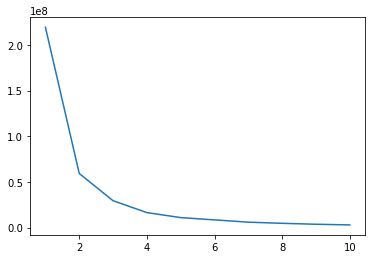

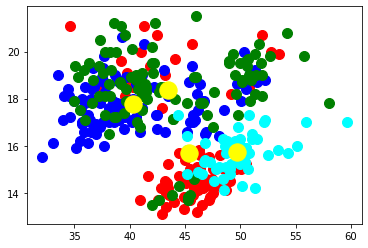

In [14]:
# https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
from sklearn.cluster import KMeans
ssd = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
plt.plot(range(1,11),ssd)
plt.show()

# kmeans = KMeans(n_clusters=5)
# y_kmeans = kmeans.fit_predict(X)
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.

kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means

y_kmeans = kmeans.fit_predict(X)

#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

plt.show()

H:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


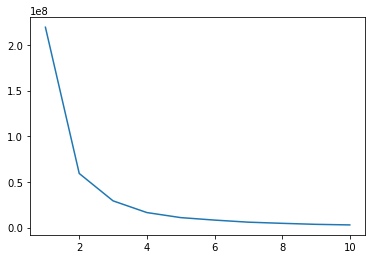

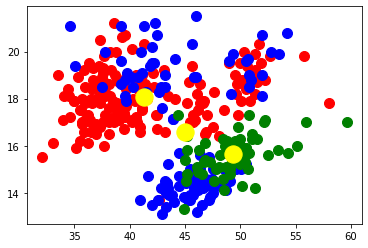

In [20]:
# https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

from sklearn.cluster import KMeans
ssd = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
plt.plot(range(1,11),ssd)
plt.show()

# kmeans = KMeans(n_clusters=5)
# y_kmeans = kmeans.fit_predict(X)
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.

kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)

#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

plt.show()

In [16]:
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.

kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means

y_kmeans = kmeans.fit_predict(X)

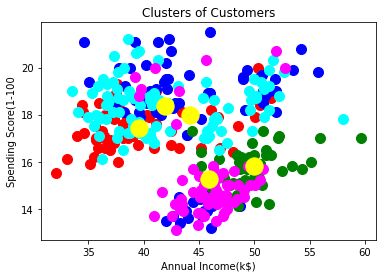

In [17]:
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()